Kelompok:
1. Abar Almazari
2. Adiyasa Pratama Putra
3. Muhammad Affan
4. Muhammad Zahranhaq Algifar

# Deklarasi Library

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib.ticker import FuncFormatter

# Kurs Australia Dollar (AUD)

In [544]:
df1 = pd.read_excel("D:\Download\Kurs Transaksi AUD  .xlsx", engine='openpyxl')

# Ubah kolom jadi datetime (kalau belum)
df1['Tanggal'] = pd.to_datetime(df1['Tanggal'])

# Urutkan dari yang paling lama ke paling baru
AUD = df1.sort_values(by='Tanggal', ascending=True).reset_index(drop=True)

AUD.head(30)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\2072279781.py:1: SyntaxWarning: invalid escape sequence '\D'
  df1 = pd.read_excel("D:\Download\Kurs Transaksi AUD  .xlsx", engine='openpyxl')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\2072279781.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Tanggal'] = pd.to_datetime(df1['Tanggal'])


,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,19,1,10106.39,9999.41,2025-01-02
1,18,1,10124.81,10022.45,2025-01-03
2,17,1,10126.00,10020.41,2025-01-06
3,16,1,10141.94,10036.18,2025-01-07
4,15,1,10198.40,10095.32,2025-01-08
5,14,1,10140.43,10034.70,2025-01-09
6,13,1,10090.16,9984.91,2025-01-10
7,12,1,10082.34,9975.58,2025-01-13
8,11,1,10059.61,9953.03,2025-01-14
9,10,1,10131.46,10029.02,2025-01-15


In [545]:
AUD['SMA Kurs Jual'] = AUD.iloc[:,2].rolling(window=3).mean().round(2)
AUD.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual
0,19,1,10106.39,9999.41,2025-01-02,NaN
1,18,1,10124.81,10022.45,2025-01-03,NaN
2,17,1,10126.00,10020.41,2025-01-06,10119.07
3,16,1,10141.94,10036.18,2025-01-07,10130.92
4,15,1,10198.40,10095.32,2025-01-08,10155.45


In [546]:
AUD['SMA Kurs Beli'] = AUD.iloc[:,3].rolling(window=3).mean().round(2)
AUD.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual,SMA Kurs Beli
0,19,1,10106.39,9999.41,2025-01-02,NaN,NaN
1,18,1,10124.81,10022.45,2025-01-03,NaN,NaN
2,17,1,10126.00,10020.41,2025-01-06,10119.07,10014.09
3,16,1,10141.94,10036.18,2025-01-07,10130.92,10026.35
4,15,1,10198.40,10095.32,2025-01-08,10155.45,10050.64


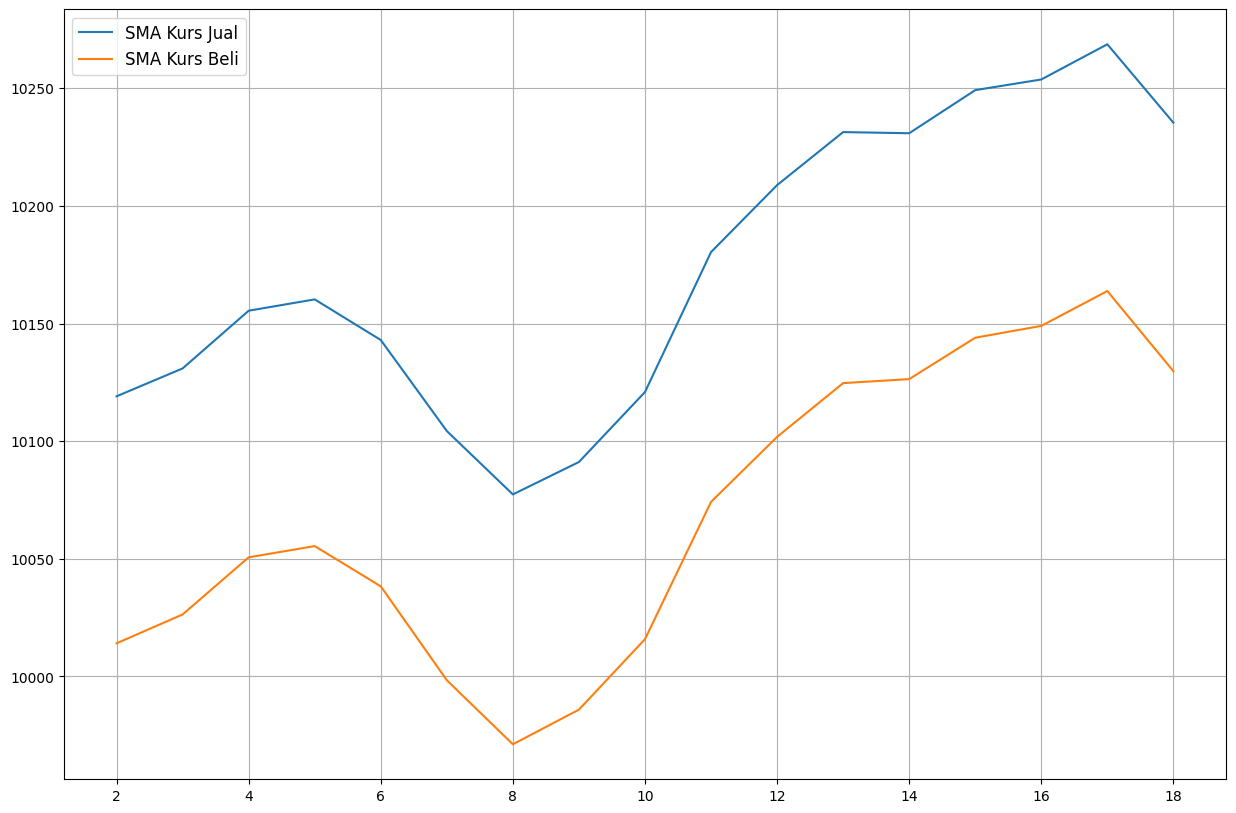

In [547]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(AUD['SMA Kurs Jual'], label='SMA Kurs Jual')
plt.plot(AUD['SMA Kurs Beli'], label='SMA Kurs Beli')
plt.legend(loc=2, fontsize='large')

In [548]:
# Untuk AUD

saldo_mata_uang_AUD = 0  # kita anggap beli mata uang asing dan simpan
modal_rp_AUD       = 25_000_000   # Modal awal dalam Rupiah

# Iterasi mulai dari baris ke-2 SMA valid (bukan NaN)
for i in range(len(AUD)):
    kurs_AUD = AUD.loc[i, 'Kurs Jual']
    sma_AUD = AUD.loc[i, 'SMA Kurs Jual']

    # Lewati jika SMA belum tersedia (NaN)
    if pd.isna(sma_AUD):
        continue

    # Strategi:
    if kurs_AUD < sma_AUD and modal_rp_AUD >= kurs_AUD:
        # Beli mata uang asing
        saldo_mata_uang_AUD = modal_rp_AUD / kurs_AUD
        modal_rp_AUD = 0
        print(f"{AUD.loc[i, 'Tanggal'].date()} - BELI @ {kurs_AUD:.2f}")
        
    elif kurs_AUD > sma_AUD and saldo_mata_uang_AUD > 0:
        # Jual mata uang asing
        modal_rp_AUD = saldo_mata_uang_AUD * kurs_AUD
        saldo_mata_uang_AUD = 0
        print(f"{AUD.loc[i, 'Tanggal'].date()} - JUAL @ {kurs_AUD:.2f}")

# Hitung total dana akhir (jika masih pegang mata uang asing, konversi ke IDR)
kurs_terakhir_AUD = AUD.loc[len(AUD)-1, 'Kurs Jual']
total_akhir_AUD = modal_rp_AUD + (saldo_mata_uang_AUD * kurs_terakhir_AUD)

print(f"\nDana akhir setelah simulasi: {total_akhir_AUD:.2f} IDR")

2025-01-09 - BELI @ 10140.43
2025-01-15 - JUAL @ 10131.46
2025-01-24 - BELI @ 10252.81
2025-01-30 - JUAL @ 10281.45
2025-01-31 - BELI @ 10171.84

Dana akhir setelah simulasi: 25047658.29 IDR


2025-01-09 00:00:00 - BELI @ 10140.43
2025-01-15 00:00:00 - JUAL @ 10131.46
2025-01-24 00:00:00 - BELI @ 10252.81
2025-01-30 00:00:00 - JUAL @ 10281.45
2025-01-31 00:00:00 - BELI @ 10171.84
      Tanggal  Kurs Jual  SMA Kurs Jual      Dana
0  2025-01-02   10106.39            NaN  25000000
1  2025-01-03   10124.81            NaN  25000000
2  2025-01-06   10126.00       10119.07  25000000
3  2025-01-07   10141.94       10130.92  25000000
4  2025-01-08   10198.40       10155.45  25000000
5  2025-01-09   10140.43       10160.26  25000000
6  2025-01-10   10090.16       10143.00  24876065
7  2025-01-13   10082.34       10104.31  24856786
8  2025-01-14   10059.61       10077.37  24800748
9  2025-01-15   10131.46       10091.14  24977886
10 2025-01-16   10171.58       10120.88  24977886
11 2025-01-17   10238.05       10180.36  24977886
12 2025-01-20   10216.83       10208.82  24977886
13 2025-01-21   10239.24       10231.37  24977886
14 2025-01-22   10236.57       10230.88  24977886
15 2025-01

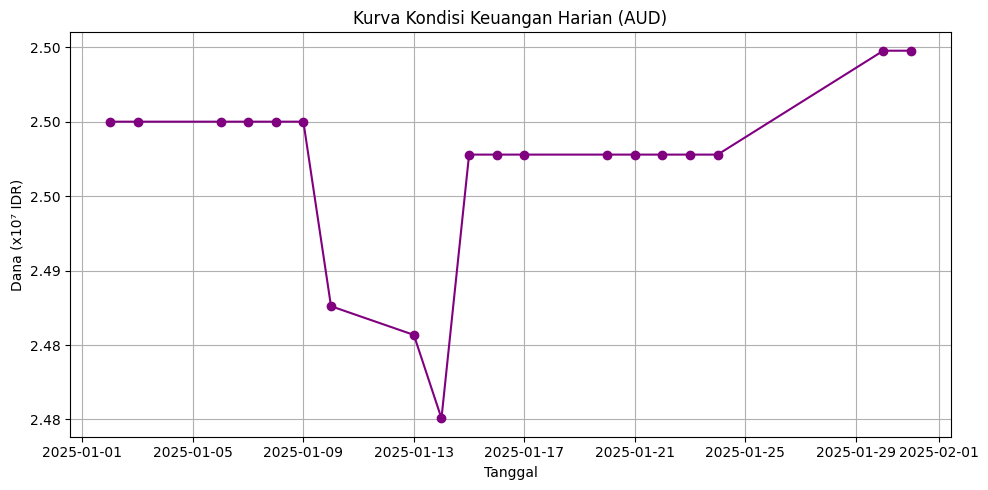

In [549]:
# Simulasi ulang modal
modal_awal = 25_000_000
modal_rp_AUD = modal_awal
saldo_mata_uang_AUD = 0
dana_list = []

# Iterasi baris demi baris
for idx, row in AUD.iterrows():
    kurs_AUD_2 = row['Kurs Jual']
    sma_AUD = row['SMA Kurs Jual']

    if pd.isna(sma_AUD):
        nilai = modal_rp_AUD if saldo_mata_uang_AUD == 0 else saldo_mata_uang_AUD * kurs_AUD_2
        dana_list.append(round(nilai))  # pembulatan agar angka tidak koma
        continue

    if saldo_mata_uang_AUD == 0 and kurs_AUD_2 < sma_AUD:
        saldo_mata_uang_AUD = modal_rp_AUD / kurs_AUD_2
        modal_rp_AUD = 0
        print(f"{row['Tanggal']} - BELI @ {kurs_AUD_2:.2f}")

    elif saldo_mata_uang_AUD > 0 and kurs_AUD_2 > sma_AUD:
        modal_rp_AUD = saldo_mata_uang_AUD * kurs_AUD_2
        saldo_mata_uang_AUD = 0
        print(f"{row['Tanggal']} - JUAL @ {kurs_AUD_2:.2f}")

    nilai = modal_rp_AUD if saldo_mata_uang_AUD == 0 else saldo_mata_uang_AUD * kurs_AUD_2
    dana_list.append(round(nilai))

# Tambahkan kolom Dana (dalam satuan penuh IDR)
AUD['Dana'] = dana_list

# Cetak data dana utuh
print(AUD[['Tanggal', 'Kurs Jual', 'SMA Kurs Jual', 'Dana']])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(AUD['Tanggal'], AUD['Dana'], marker='o', color='purple')
plt.title('Kurva Kondisi Keuangan Harian (AUD)')
plt.xlabel('Tanggal')
plt.ylabel('Dana (x10⁷ IDR)')
plt.grid(True)

# Format sumbu Y dalam satuan 10^7
formatter = FuncFormatter(lambda y, _: f'{y / 1e7:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Kurs Great Britain Poundsterling

In [550]:
df2 = pd.read_excel("D:\Download\Kurs Transaksi GBP  .xlsx")

# Ubah kolom jadi datetime (kalau belum)
df2['Tanggal'] = pd.to_datetime(df2['Tanggal'])

# Urutkan dari yang paling lama ke paling baru
GBP = df2.sort_values(by='Tanggal', ascending=True).reset_index(drop=True)

GBP.head(30)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\2718571669.py:1: SyntaxWarning: invalid escape sequence '\D'
  df2 = pd.read_excel("D:\Download\Kurs Transaksi GBP  .xlsx")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\2718571669.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Tanggal'] = pd.to_datetime(df2['Tanggal'])


,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,19,1,20402.77,20190.12,2025-01-02
1,18,1,20435.64,20224.22,2025-01-03
2,17,1,20212.88,20005.31,2025-01-06
3,16,1,20269.23,20061.09,2025-01-07
4,15,1,20400.05,20190.64,2025-01-08
5,14,1,20303.65,20095.19,2025-01-09
6,13,1,20008.96,19803.40,2025-01-10
7,12,1,20006.82,19801.30,2025-01-13
8,11,1,19865.60,19659.82,2025-01-14
9,10,1,19963.77,19757.02,2025-01-15


In [551]:
GBP['SMA Kurs Jual'] = GBP.iloc[:,2].rolling(window=3).mean().round(2)
GBP.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual
0,19,1,20402.77,20190.12,2025-01-02,NaN
1,18,1,20435.64,20224.22,2025-01-03,NaN
2,17,1,20212.88,20005.31,2025-01-06,20350.43
3,16,1,20269.23,20061.09,2025-01-07,20305.92
4,15,1,20400.05,20190.64,2025-01-08,20294.05


In [552]:
GBP['SMA Kurs Beli'] = GBP.iloc[:,3].rolling(window=3).mean().round(2)
GBP.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual,SMA Kurs Beli
0,19,1,20402.77,20190.12,2025-01-02,NaN,NaN
1,18,1,20435.64,20224.22,2025-01-03,NaN,NaN
2,17,1,20212.88,20005.31,2025-01-06,20350.43,20139.88
3,16,1,20269.23,20061.09,2025-01-07,20305.92,20096.87
4,15,1,20400.05,20190.64,2025-01-08,20294.05,20085.68


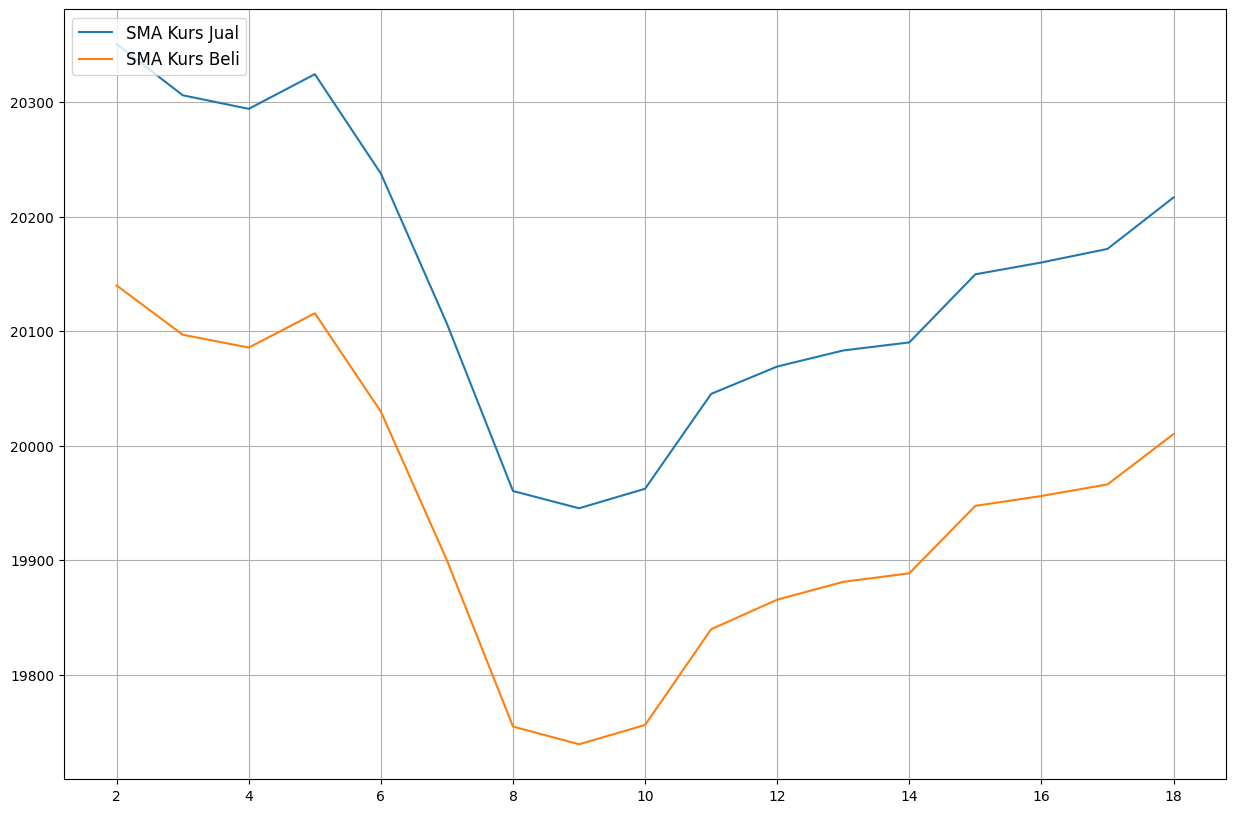

In [553]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(GBP['SMA Kurs Jual'], label='SMA Kurs Jual')
plt.plot(GBP['SMA Kurs Beli'], label='SMA Kurs Beli')
plt.legend(loc=2, fontsize='large')

In [554]:
# Untuk GBP

saldo_mata_uang_GBP = 0  # kita anggap beli mata uang asing dan simpan
modal_rp_GBP       = 25_000_000   # Modal awal dalam Rupiah

# Iterasi mulai dari baris ke-2 SMA valid (bukan NaN)
for i in range(len(GBP)):
    kurs_GBP = GBP.loc[i, 'Kurs Jual']
    sma_GBP = GBP.loc[i, 'SMA Kurs Jual']

    # Lewati jika SMA belum tersedia (NaN)
    if pd.isna(sma_GBP):
        continue

    # Strategi:
    if kurs_GBP < sma_GBP and modal_rp_GBP >= kurs_GBP:
        # Beli mata uang asing
        saldo_mata_uang_GBP = modal_rp_GBP / kurs_GBP
        modal_rp_GBP = 0
        print(f"{GBP.loc[i, 'Tanggal'].date()} - BELI @ {kurs_GBP:.2f}")
        
    elif kurs_GBP > sma_GBP and saldo_mata_uang_GBP > 0:
        # Jual mata uang asing
        modal_rp_GBP = saldo_mata_uang_GBP * kurs_GBP
        saldo_mata_uang_GBP = 0
        print(f"{GBP.loc[i, 'Tanggal'].date()} - JUAL @ {kurs_GBP:.2f}")

# Hitung total dana akhir (jika masih pegang mata uang asing, konversi ke IDR)
kurs_terakhir_GBP = GBP.loc[len(GBP)-1, 'Kurs Jual']
total_akhir_GBP = modal_rp_GBP + (saldo_mata_uang_GBP * kurs_terakhir_GBP)

print(f"\nDana akhir setelah simulasi: {total_akhir_GBP:.2f} IDR")

2025-01-06 - BELI @ 20212.88
2025-01-08 - JUAL @ 20400.05
2025-01-09 - BELI @ 20303.65
2025-01-15 - JUAL @ 19963.77
2025-01-20 - BELI @ 20035.45
2025-01-21 - JUAL @ 20100.04
2025-01-24 - BELI @ 20131.03
2025-01-31 - JUAL @ 20348.58

Dana akhir setelah simulasi: 25158075.42 IDR


2025-01-06 00:00:00 - BELI @ 20212.88
2025-01-08 00:00:00 - JUAL @ 20400.05
2025-01-09 00:00:00 - BELI @ 20303.65
2025-01-15 00:00:00 - JUAL @ 19963.77
2025-01-20 00:00:00 - BELI @ 20035.45
2025-01-21 00:00:00 - JUAL @ 20100.04
2025-01-24 00:00:00 - BELI @ 20131.03
2025-01-31 00:00:00 - JUAL @ 20348.58
      Tanggal  Kurs Jual  SMA Kurs Jual      Dana
0  2025-01-02   20402.77            NaN  25000000
1  2025-01-03   20435.64            NaN  25000000
2  2025-01-06   20212.88       20350.43  25000000
3  2025-01-07   20269.23       20305.92  25069696
4  2025-01-08   20400.05       20294.05  25231498
5  2025-01-09   20303.65       20324.31  25231498
6  2025-01-10   20008.96       20237.55  24865285
7  2025-01-13   20006.82       20106.48  24862626
8  2025-01-14   19865.60       19960.46  24687130
9  2025-01-15   19963.77       19945.40  24809127
10 2025-01-16   20057.94       19962.44  24809127
11 2025-01-17   20113.99       20045.23  24809127
12 2025-01-20   20035.45       20069.13  24809

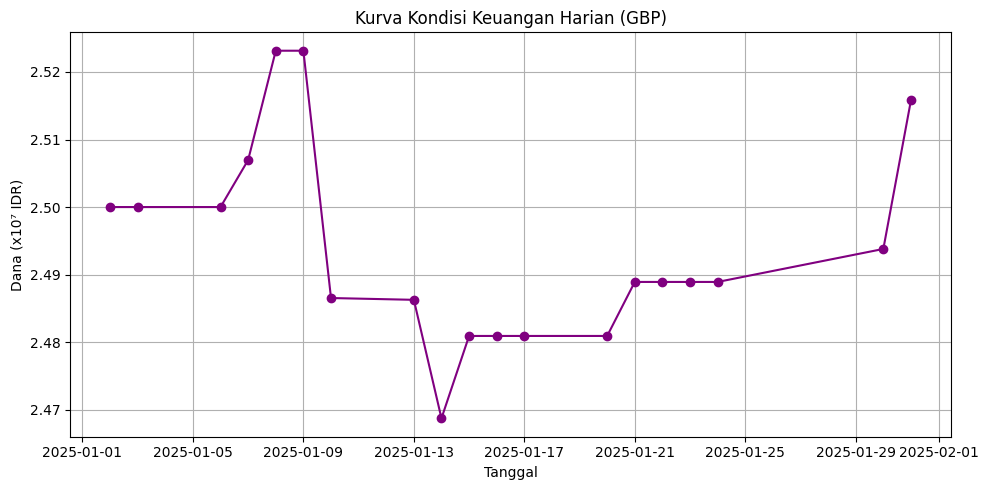

In [555]:
# Simulasi ulang modal
modal_awal = 25_000_000
modal_rp_GBP = modal_awal
saldo_mata_uang_GBP = 0
dana_list_GBP = []

# Iterasi baris demi baris
for idx, row in GBP.iterrows():
    kurs_GBP = row['Kurs Jual']
    sma_GBP = row['SMA Kurs Jual']

    if pd.isna(sma_GBP):
        nilai_GBP = modal_rp_GBP if saldo_mata_uang_GBP == 0 else saldo_mata_uang_GBP * kurs_GBP
        dana_list_GBP.append(round(nilai_GBP))  # pembulatan agar angka tidak koma
        continue

    if saldo_mata_uang_GBP == 0 and kurs_GBP < sma_GBP:
        saldo_mata_uang_GBP = modal_rp_GBP / kurs_GBP
        modal_rp_GBP = 0
        print(f"{row['Tanggal']} - BELI @ {kurs_GBP:.2f}")

    elif saldo_mata_uang_GBP > 0 and kurs_GBP > sma_GBP:
        modal_rp_GBP = saldo_mata_uang_GBP * kurs_GBP
        saldo_mata_uang_GBP = 0
        print(f"{row['Tanggal']} - JUAL @ {kurs_GBP:.2f}")

    nilai_GBP = modal_rp_GBP if saldo_mata_uang_GBP == 0 else saldo_mata_uang_GBP * kurs_GBP
    dana_list_GBP.append(round(nilai_GBP))

# Tambahkan kolom Dana (dalam satuan penuh IDR)
GBP['Dana'] = dana_list_GBP

# Cetak data dana utuh
print(GBP[['Tanggal', 'Kurs Jual', 'SMA Kurs Jual', 'Dana']])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(GBP['Tanggal'], GBP['Dana'], marker='o', color='purple')
plt.title('Kurva Kondisi Keuangan Harian (GBP)')
plt.xlabel('Tanggal')
plt.ylabel('Dana (x10⁷ IDR)')
plt.grid(True)

# Format sumbu Y dalam satuan 10^7
formatter = FuncFormatter(lambda y, _: f'{y / 1e7:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Kurs Euro

In [556]:
df3 = pd.read_excel("D:\Download\Kurs Transaksi EUR  .xlsx")

# Ubah kolom jadi datetime (kalau belum)
df3['Tanggal'] = pd.to_datetime(df3['Tanggal'])

# Urutkan dari yang paling lama ke paling baru
EUR = df3.sort_values(by='Tanggal', ascending=True).reset_index(drop=True)

EUR.head(30)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\3227854960.py:1: SyntaxWarning: invalid escape sequence '\D'
  df3 = pd.read_excel("D:\Download\Kurs Transaksi EUR  .xlsx")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9276\3227854960.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Tanggal'] = pd.to_datetime(df3['Tanggal'])


,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,19,1,16908.40,16736.95,2025-01-02
1,18,1,16911.13,16739.62,2025-01-03
2,17,1,16757.69,16587.73,2025-01-06
3,16,1,16811.01,16635.67,2025-01-07
4,15,1,16924.21,16754.21,2025-01-08
5,14,1,16824.19,16655.18,2025-01-09
6,13,1,16795.71,16622.13,2025-01-10
7,12,1,16759.96,16589.98,2025-01-13
8,11,1,16715.84,16547.88,2025-01-14
9,10,1,16763.16,16594.74,2025-01-15


In [557]:
EUR['SMA Kurs Jual'] = EUR.iloc[:,2].rolling(window=3).mean().round(2)
EUR.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual
0,19,1,16908.40,16736.95,2025-01-02,NaN
1,18,1,16911.13,16739.62,2025-01-03,NaN
2,17,1,16757.69,16587.73,2025-01-06,16859.07
3,16,1,16811.01,16635.67,2025-01-07,16826.61
4,15,1,16924.21,16754.21,2025-01-08,16830.97


In [558]:
EUR['SMA Kurs Beli'] = EUR.iloc[:,3].rolling(window=3).mean().round(2)
EUR.head()

,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal,SMA Kurs Jual,SMA Kurs Beli
0,19,1,16908.40,16736.95,2025-01-02,NaN,NaN
1,18,1,16911.13,16739.62,2025-01-03,NaN,NaN
2,17,1,16757.69,16587.73,2025-01-06,16859.07,16688.10
3,16,1,16811.01,16635.67,2025-01-07,16826.61,16654.34
4,15,1,16924.21,16754.21,2025-01-08,16830.97,16659.20


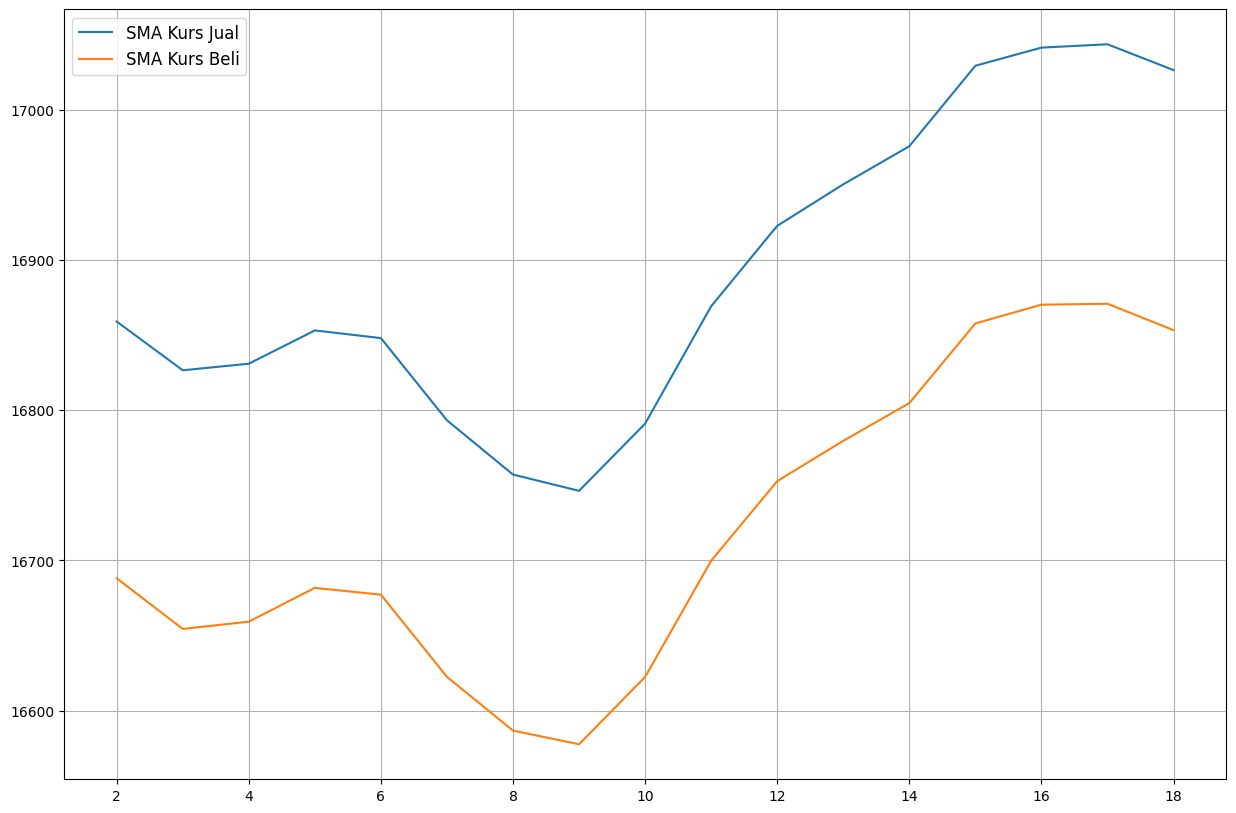

In [559]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(EUR['SMA Kurs Jual'], label='SMA Kurs Jual')
plt.plot(EUR['SMA Kurs Beli'], label='SMA Kurs Beli')
plt.legend(loc=2, fontsize='large')

In [560]:
# Untuk EUR

saldo_mata_uang_EUR = 0  # kita anggap beli mata uang asing dan simpan
modal_rp_EUR       = 25_000_000   # Modal awal dalam Rupiah

# Iterasi mulai dari baris ke-2 SMA valid (bukan NaN)
for i in range(len(EUR)):
    kurs_EUR = EUR.loc[i, 'Kurs Jual']
    sma_EUR = EUR.loc[i, 'SMA Kurs Jual']

    # Lewati jika SMA belum tersedia (NaN)
    if pd.isna(sma_EUR):
        continue

    # Strategi:
    if kurs_EUR < sma_EUR and modal_rp_EUR >= kurs_EUR:
        # Beli mata uang asing
        saldo_mata_uang_EUR = modal_rp_EUR / kurs_EUR
        modal_rp_EUR = 0
        print(f"{EUR.loc[i, 'Tanggal'].date()} - BELI @ {kurs_EUR:.2f}")
        
    elif kurs_EUR > sma_EUR and saldo_mata_uang_EUR > 0:
        # Jual mata uang asing
        modal_rp_EUR = saldo_mata_uang_EUR * kurs_EUR
        saldo_mata_uang_EUR = 0
        print(f"{EUR.loc[i, 'Tanggal'].date()} - JUAL @ {kurs_EUR:.2f}")

# Hitung total dana akhir (jika masih pegang mata uang asing, konversi ke IDR)
kurs_terakhir_EUR = EUR.loc[len(EUR)-1, 'Kurs Jual']
total_akhir_EUR = modal_rp_EUR + (saldo_mata_uang_EUR * kurs_terakhir_EUR)

print(f"\nDana akhir setelah simulasi: {total_akhir_EUR:.2f} IDR")

2025-01-06 - BELI @ 16757.69
2025-01-08 - JUAL @ 16924.21
2025-01-09 - BELI @ 16824.19
2025-01-15 - JUAL @ 16763.16
2025-01-24 - BELI @ 17013.31
2025-01-31 - JUAL @ 17033.13

Dana akhir setelah simulasi: 25186141.19 IDR


2025-01-06 00:00:00 - BELI @ 16757.69
2025-01-08 00:00:00 - JUAL @ 16924.21
2025-01-09 00:00:00 - BELI @ 16824.19
2025-01-15 00:00:00 - JUAL @ 16763.16
2025-01-24 00:00:00 - BELI @ 17013.31
2025-01-31 00:00:00 - JUAL @ 17033.13
      Tanggal  Kurs Jual  SMA Kurs Jual      Dana
0  2025-01-02   16908.40            NaN  25000000
1  2025-01-03   16911.13            NaN  25000000
2  2025-01-06   16757.69       16859.07  25000000
3  2025-01-07   16811.01       16826.61  25079546
4  2025-01-08   16924.21       16830.97  25248423
5  2025-01-09   16824.19       16853.14  25248423
6  2025-01-10   16795.71       16848.04  25205683
7  2025-01-13   16759.96       16793.29  25152032
8  2025-01-14   16715.84       16757.17  25085820
9  2025-01-15   16763.16       16746.32  25156834
10 2025-01-16   16894.17       16791.06  25156834
11 2025-01-17   16950.39       16869.24  25156834
12 2025-01-20   16923.83       16922.80  25156834
13 2025-01-21   16977.09       16950.44  25156834
14 2025-01-22   17026.

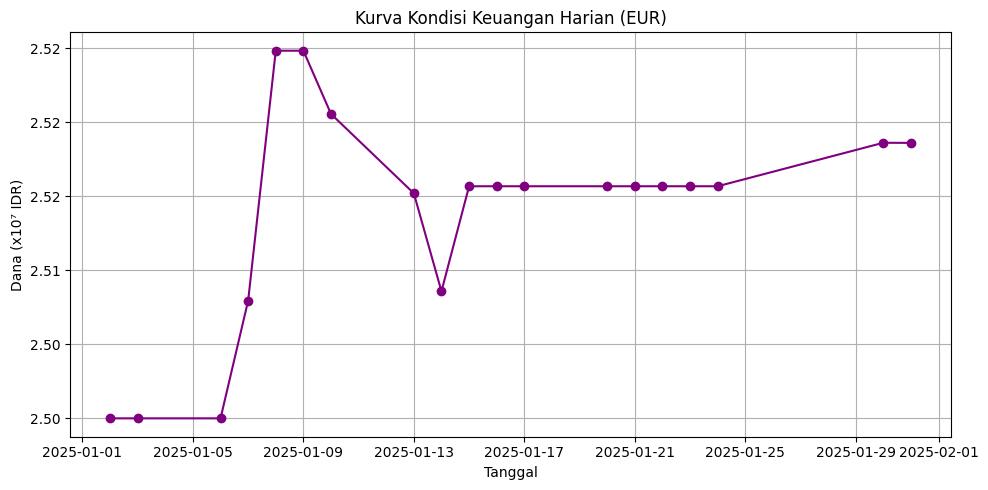

In [561]:
#EUR
# Simulasi ulang modal
modal_awal = 25_000_000
modal_rp_EUR = modal_awal
saldo_mata_uang_EUR = 0
dana_list = []

# Iterasi baris demi baris
for idx, row in EUR.iterrows():
    kurs_EUR = row['Kurs Jual']
    sma_EUR = row['SMA Kurs Jual']

    if pd.isna(sma_EUR):
        nilai = modal_rp_EUR if saldo_mata_uang_EUR == 0 else saldo_mata_uang_EUR * kurs_EUR
        dana_list.append(round(nilai))  # pembulatan agar angka tidak koma
        continue

    if saldo_mata_uang_EUR == 0 and kurs_EUR < sma_EUR:
        saldo_mata_uang_EUR = modal_rp_EUR / kurs_EUR
        modal_rp_EUR = 0
        print(f"{row['Tanggal']} - BELI @ {kurs_EUR:.2f}")

    elif saldo_mata_uang_EUR > 0 and kurs_EUR > sma_EUR:
        modal_rp_EUR = saldo_mata_uang_EUR * kurs_EUR
        saldo_mata_uang_EUR = 0
        print(f"{row['Tanggal']} - JUAL @ {kurs_EUR:.2f}")

    nilai = modal_rp_EUR if saldo_mata_uang_EUR == 0 else saldo_mata_uang_EUR * kurs_EUR
    dana_list.append(round(nilai))

# Tambahkan kolom Dana (dalam satuan penuh IDR)
EUR['Dana'] = dana_list

# Cetak data dana utuh
print(EUR[['Tanggal', 'Kurs Jual', 'SMA Kurs Jual', 'Dana']])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(EUR['Tanggal'], EUR['Dana'], marker='o', color='purple')
plt.title('Kurva Kondisi Keuangan Harian (EUR)')
plt.xlabel('Tanggal')
plt.ylabel('Dana (x10⁷ IDR)')
plt.grid(True)

# Format sumbu Y dalam satuan 10^7
formatter = FuncFormatter(lambda y, _: f'{y / 1e7:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()